In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df['Car_Name'].value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [5]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [6]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [7]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [8]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [9]:
# check duplication
df.duplicated().sum()

np.int64(2)

In [10]:
# drop duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [14]:
# encoding "Fuel_Type" , "Seller_Type", "Transmission Columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

columns = ['Fuel_Type', 'Selling_type', 'Transmission']

for col in columns:
    df[col] = le.fit_transform(df[col])

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [17]:
df['Fuel_Type'].value_counts()

Fuel_Type
2    239
1     58
0      2
Name: count, dtype: int64

In [31]:
df.to_csv('Cleaned_data.csv', index=False)

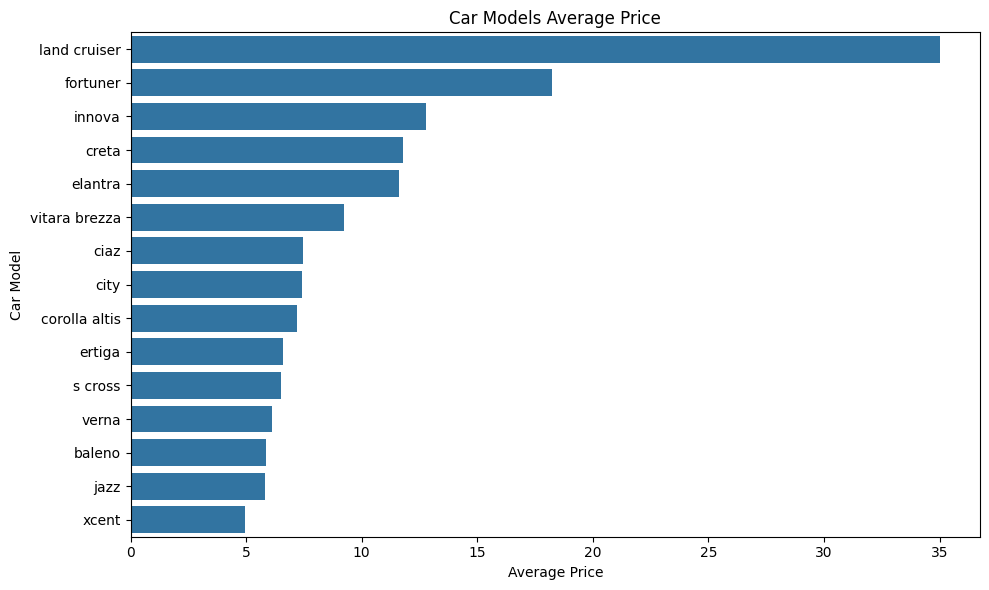

In [21]:
# Calculate average price for each car model
avg_price = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plotting top car models by average price
car_models = avg_price.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=car_models.values, y=car_models.index)
plt.title('Car Models Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

## Splitting the data

In [22]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

## Train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
model.coef_

array([ 3.42071393e-01,  4.41254421e-01, -9.41472378e-06, -1.22494762e+00,
       -1.29057772e+00, -1.57792987e+00,  6.98019859e-01])

In [27]:
model.intercept_

np.float64(-683.1699340065926)

# Evaluation

In [28]:
#Prediction on train data
ypred_train=model.predict(X_train)

#Evaluation on train data
from sklearn.metrics import r2_score, mean_squared_error
print('Train r2 :', r2_score(y_train,ypred_train))

print("Train RMSE :", np.sqrt(mean_squared_error(y_train,ypred_train)))

from sklearn.model_selection import cross_val_score
print("CV Score : ", cross_val_score(model,X_train,y_train, cv=5, scoring='r2').mean())

Train r2 : 0.9026721090053067
Train RMSE : 1.544347737595957
CV Score :  0.8664555824927105


In [29]:
#Prediction on test data
ypred_test=model.predict(X_test)

from sklearn.metrics import r2_score
print('Test r2 :', r2_score(y_test,ypred_test))

print("Test RMSE :", np.sqrt(mean_squared_error(y_test,ypred_test)))

Test r2 : 0.7409934356413107
Test RMSE : 2.583688081114548


# p value

In [30]:
import statsmodels.formula.api as smf

model1=smf.ols('y~X', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     292.9
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          9.75e-128
Time:                        09:52:51   Log-Likelihood:                -592.30
No. Observations:                 299   AIC:                             1201.
Df Residuals:                     291   BIC:                             1230.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -805.8843     87.037     -9.259      0.000    -977.185    -634.583
X[0]           0.4030      0.043      9.344      0.000       0.318       0.488
X[1]           0.4419      0.016     27.755      0.000       0.411       0.473
X[2]       -6.092e-06   3.25e-06     -1.875      0.062   -1.25e-05    3.02e-07
X[3]          -1.4576      0.279     -5.223      0.000      -2.007      -0.908
X[4]          -1.1332      0.259     -4.383      0.000      -1.642      -0.624
X[5]          -1.3358      0.332     -4.023      0.000      -1.989      -0.682
X[6]          -0.6650      0.426     -1.562      0.119      -1.503       0.173
==============================================================================
Omnibus:                       98.754   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.399
Skew:                           1.103   Prob(JB):                    1.91e-173
Kurtosis:                      10.680   Cond. No.                     4.54e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""